## ECE113 Lab 0 - Basic Python and DTFT <br> <small> April 23, 2021 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on CCLE.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

__A0.__ Type any function followed by '?' returns a help window.

__Q1.__ What do you have to import to make all division a real division?

__A1.__ import division from the future

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ np and plt

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print x

__A3.__ [7 2 3 4 5 6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [4]:
# A4.
import numpy as np
x = np.array([5,4,3,2,1,0,1,2,3,4])
print(x)

[5 4 3 2 1 0 1 2 3 4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [5]:
# A5.
import numpy as np
from numpy import r_
print (np.r_[0:5:2]) # every other integer from 0 ... 4

[0 2 4]


__Q6.__ Generate the same plot as in the following figure inline:
    



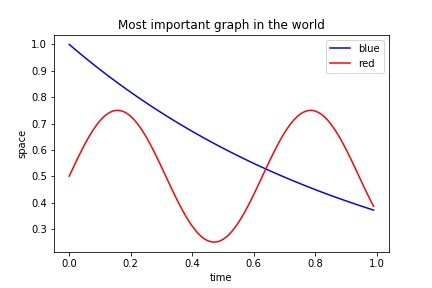

In [11]:
from IPython.display import Image
Image('tutorial_plot.jpg')

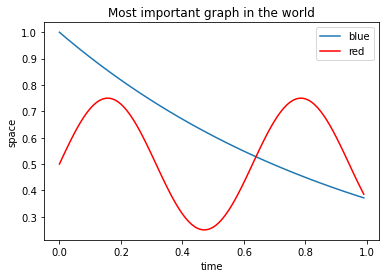

In [13]:
# A6.

import matplotlib.pyplot as plt # by convention, we import pyplot as plt

# plot in browser instead of opening new windows
%matplotlib inline
# Generate signals
x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5
plt.figure()
plt.plot( x, y1 )
plt.plot( x, y2, "red" )
plt.xlabel( "time" )
plt.ylabel( "space" )
plt.title( "Most important graph in the world" )

plt.legend( ("blue", "red") )

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [5]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

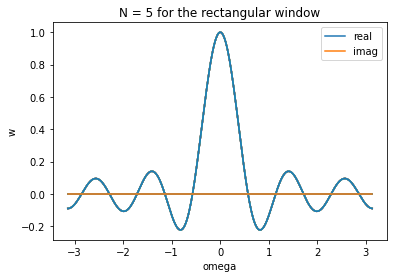

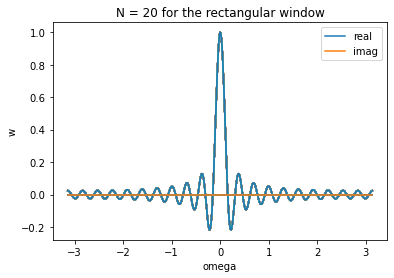

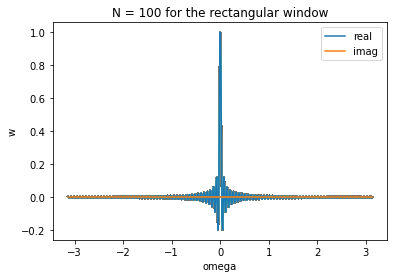

In [181]:
##    #repeat for N = 5, 20, 100
for N in [5, 20, 100]: 
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) using np.ones
        w = np.ones(len(NN))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        omega = np.r_[-1*np.pi : np.pi: 2*np.pi/512]


        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        [n, omega] = np.meshgrid(NN,omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * (omega))
        
        # evaluate DTFT
        W = DTFT.dot(w)
        
        # normalize W such that W at omega=0 is 1
        W *= (1/W.max())
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(omega,W.real)
        plt.plot(omega,W.imag) 
      
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega" )
        plt.ylabel( "w" )
        plt.title( "N = "+str(N)+" for the rectangular window" )
        plt.legend( ("real", "imag") )
        

Describe the effect of increasing $N$ on the DTFT:
As N increases, the width of sidelobe decreases, the plot looks more sharp and more like delta.

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

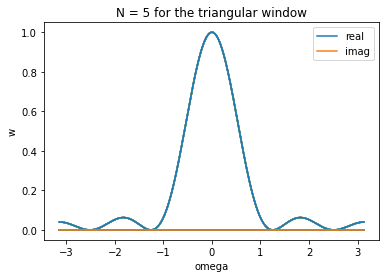

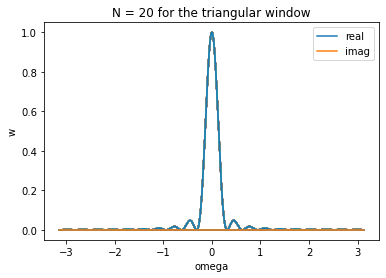

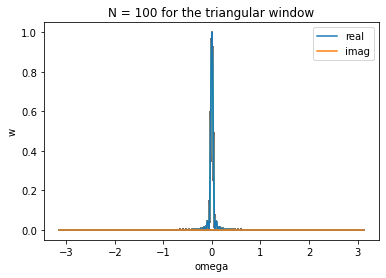

In [188]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        w = np.ones(len(NN))
        w_delta = (1-abs(NN)/N)*w
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        omega = np.r_[-1*np.pi : np.pi: 2*np.pi/512]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        [n, omega] = np.meshgrid(NN,omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w_delta)
         
        # normalize W such that W at omega=0 is 1
        W *= (1/W.max())
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(omega,W.real)
        plt.plot(omega,W.imag) 
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega" )
        plt.ylabel( "w" )
        plt.title( "N = "+str(N)+" for the triangular window" )
        plt.legend( ("real", "imag") )
        

Describe the effect of increasing $N$ on the DTFT:
As N increases, the width of sidelobe decreases, the plot looks more sharp and more like delta.

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

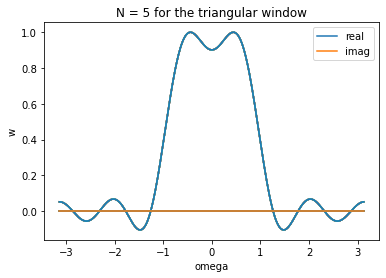

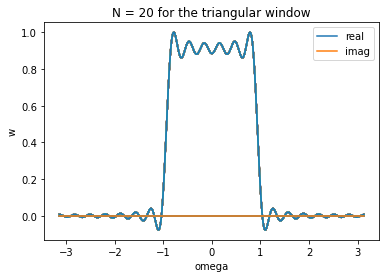

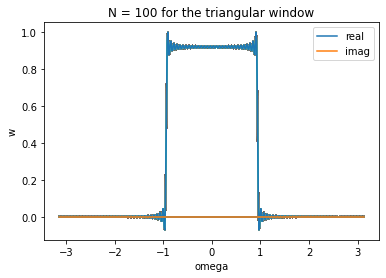

In [185]:
    #repeat for N = 5, 20, 100
    #truncate the impluse for part a
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        w = np.ones(len(NN))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        omega = np.r_[-1*np.pi : np.pi: 2*np.pi/512]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        [n, omega] = np.meshgrid(NN,omega)
        
        # create DTFT matrix and adding the lowpass filter using sinc function
        DTFT = np.exp( -1j * n * omega )* 0.3 * np.sinc(0.3 * n)
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W *= (1/W.max())
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(omega,W.real)
        plt.plot(omega,W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega" )
        plt.ylabel( "w" )
        plt.title( "N = "+str(N)+" for the triangular window" )
        plt.legend( ("real", "imag") )
        
        

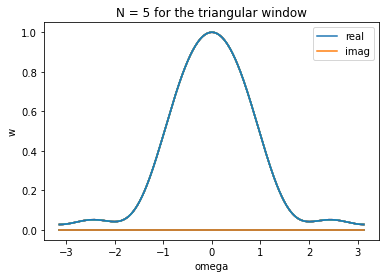

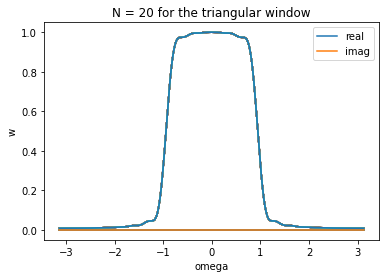

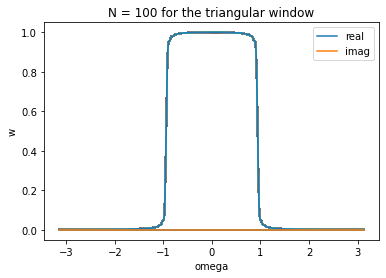

In [187]:
    #repeat for N = 5, 20, 100
    #truncate the impluse for part b
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        w = np.ones(len(NN))
        w_delta = (1-abs(NN)/N)*w
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        omega = np.r_[-1*np.pi : np.pi: 2*np.pi/512]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        [n, omega] = np.meshgrid(NN,omega)
        
        # create DTFT matrix and adding the lowpass filter using sinc function
        DTFT = np.exp( -1j * n * omega )* 0.3 *np.sinc(0.3 * n)
        
        # evaluate DTFT
        W = DTFT.dot(w_delta)
         
        # normalize W such that W at omega=0 is 1
        W *= (1/W.max())
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(omega,W.real)
        plt.plot(omega,W.imag) 
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega" )
        plt.ylabel( "w" )
        plt.title( "N = "+str(N)+" for the triangular window" )
        plt.legend( ("real", "imag") )
        

Explain the difference:

When we pulse in the low pass filter, X_N will get closer and closer to the filter, but there is still oscillation remaining. 
for the second plot, the gibbs phenomenon is less obvious. Gibbs phenomenon happpens when the sinc-looking DTFT of the signal convolved with the DTFT of the window in the frequency domain. For the triangular window, the convolution will get less sharp at the edges. so it's less obvious
____